In [113]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This project is based on information from [CIA World Book](https://www.cia.gov/library/publications/the-world-factbook/). The table 'facts' contains statistics about all the countries on Earth. Columns that are in:
- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

In [114]:
connection = sql.connect('factbook_with_cities.db')

In [115]:
query = '''SELECT * FROM sqlite_master'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [116]:
query = '''SELECT * FROM sqlite_master WHERE type="table"'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [117]:
query = '''SELECT * FROM sqlite_master'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [118]:
query = '''SELECT * FROM facts LIMIT 5'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


SQL query that return:
- Minimum population
- Maximum population
- Minimum population growth
- Maximum population growth

In [119]:
query = '''SELECT 
                MIN(population), MAX(population), 
                MIN(population_growth), MAX(population_growth) 
            FROM facts'''
pd.read_sql_query(query, connection)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


#### Those are surprising results so I need to check are these correct

In [120]:
query = '''SELECT * FROM facts
            WHERE population == 0'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [121]:
query = '''SELECT * FROM facts
            WHERE population_growth == 0'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,190,vt,Holy See (Vatican City),0,0,0.0,842,0.0,NaN,NaN,NaN
1,200,ck,Cocos (Keeling) Islands,14,14,0.0,596,0.0,NaN,NaN,NaN
2,207,gl,Greenland,2166086,2166086,NaN,57733,0.0,14.48,8.49,5.98
3,238,pc,Pitcairn Islands,47,47,0.0,48,0.0,NaN,NaN,NaN


In [122]:
query = '''SELECT * FROM facts
            WHERE population == 7256490011'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [123]:
query = '''SELECT 
                population, population_growth, birth_rate, death_rate 
            FROM facts
            WHERE 
                population != (select MAX(population) from facts) and
                population != (select MIN(population) from facts)'''
pd.read_sql_query(query, connection)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
...,...,...,...,...
235,3598357,0.60,10.86,8.67
236,103574,0.59,10.31,8.54
237,1869055,2.81,31.11,3.04
238,2785366,1.95,22.99,3.50


F:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC31278>,
      dtype=object)

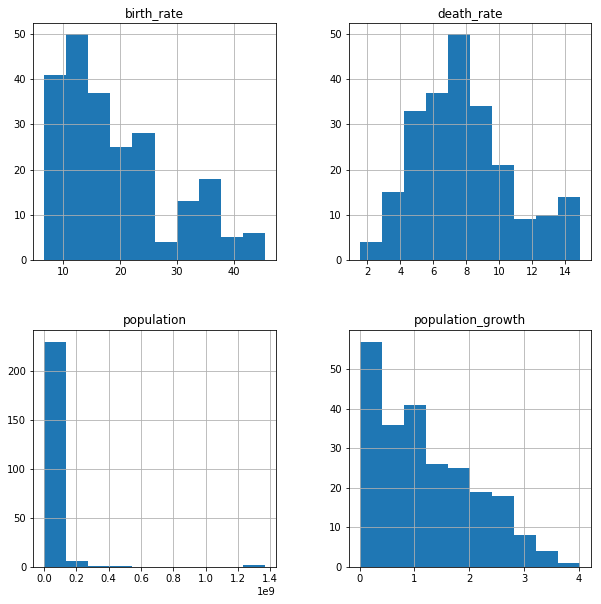

In [124]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(query, connection).hist(ax=ax)

#### Which countries have the highest population density?

In [125]:
query = '''SELECT 
                name, CAST(population as float)/CAST(area as float) density
            FROM facts
            ORDER BY density DESC'''
pd.read_sql_query(query, connection).head(10)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D010390>]],
      dtype=object)

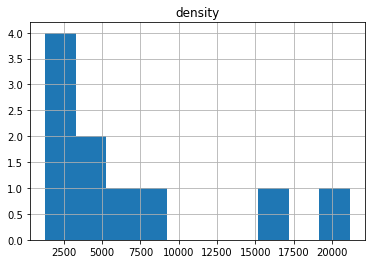

In [126]:
pd.read_sql_query(query, connection).head(10).hist()

#### Which countries have the highest ratios of water to land? 

In [127]:
query = '''SELECT 
                name, CAST(area_water as float)/CAST(area_land as float) ratio
            FROM facts
            ORDER BY ratio DESC'''
pd.read_sql_query(query, connection).head(10)

,name,ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [128]:
query = '''SELECT * FROM facts
            WHERE name == "British Indian Ocean Territory"'''
pd.read_sql_query(query, connection).head(10)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,228,io,British Indian Ocean Territory,54400,60,54340,None,None,None,None,None


#### Which countries have more water than land?

In [129]:
query = '''SELECT 
                name, area_water, area_land
            FROM facts
            WHERE area_water > area_land'''
pd.read_sql_query(query, connection)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346


In [130]:
query = '''SELECT * FROM cities'''
pd.read_sql_query(query, connection).head(5)

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


The table 'cities' contains columns:
- id - A unique ID for each city.
- name - The name of the city.
- population - The population of the city.
- capital - Whether the city is a capital city: 1 if it is, 0 if it isn't.
- facts_id - The ID of the country, from the facts table.

In [131]:
query = '''SELECT * FROM facts'''
pd.read_sql_query(query, connection).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


#### Below I will add inner join with table cities

In [132]:
query = '''SELECT * FROM facts
            INNER JOIN 
                cities on cities.facts_id = facts.id'''
pd.read_sql_query(query, connection).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180.0,180.0,0.0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184


In [133]:
query = '''SELECT 
                c.*, f.name country_name 
            FROM facts f
            INNER JOIN 
                cities c on c.facts_id = f.id'''
pd.read_sql_query(query, connection).head(5)

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


#### Building queries to find country with capital

In [134]:
query = '''SELECT 
                f.name, c.name 
            FROM cities c
            INNER JOIN 
                facts f on f.id = c.facts_id'''
pd.read_sql_query(query, connection).head(5)

,name,name
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,United Arab Emirates,Dubai
4,United Arab Emirates,Sharjah


In [135]:
query = '''SELECT 
                f.name country, c.name capital_city
            FROM cities c
            INNER JOIN 
                facts f on f.id = c.facts_id
            WHERE capital == 1'''
pd.read_sql_query(query, connection).head(5)

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers


#### Differences in both tables

In [136]:
query = '''SELECT COUNT(DISTINCT(name)) FROM facts'''
pd.read_sql_query(query, connection).head(5)

,COUNT(DISTINCT(name))
0,261


In [137]:
query = '''SELECT COUNT(DISTINCT(facts_id)) FROM cities'''
pd.read_sql_query(query, connection).head(5)

,COUNT(DISTINCT(facts_id))
0,210


So there is 51 Countries that don't have a match in cities table

In [138]:
query = '''SELECT * FROM facts
            LEFT JOIN cities ON cities.facts_id = facts.id'''
pd.read_sql_query(query, connection).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,6.0,Kabul,3097000.0,1.0,1
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,10.0,Tirana,419000.0,1.0,2
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,7.0,Algiers,2916000.0,1.0,3
3,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,8.0,Oran,783000.0,0.0,3
4,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,12.0,Andorra La Vella,23000.0,1.0,4


In [139]:
query = '''SELECT * FROM cities
            LEFT JOIN facts ON facts.id = cities.facts_id'''
pd.read_sql_query(query, connection).head(5)

,id,name,population,capital,facts_id,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,Oranjestad,37000,1,216,216,aa,Aruba,180.0,180.0,0.0,112162,1.33,12.56,8.18,8.92
1,2,Saint John'S,27000,1,6,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21
2,3,Abu Dhabi,942000,1,184,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36
3,4,Dubai,1978000,0,184,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36
4,5,Sharjah,983000,0,184,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36


In [140]:
query = '''SELECT f.name country, f.population FROM facts f
            LEFT JOIN cities c ON c.facts_id = f.id
            WHERE c.name IS NULL'''
pd.read_sql_query(query, connection).head(10)

,country,population
0,Kosovo,1870981.0
1,Monaco,30535.0
2,Nauru,9540.0
3,San Marino,33020.0
4,Singapore,5674472.0
5,Holy See (Vatican City),842.0
6,Taiwan,23415126.0
7,European Union,513949445.0
8,Ashmore and Cartier Islands,NaN
9,Christmas Island,1530.0


In [141]:
query = '''SELECT COUNT(f.name) null_values FROM facts f
            LEFT JOIN cities c ON c.facts_id = f.id
            WHERE c.name IS NULL'''
pd.read_sql_query(query, connection).head(10)

,null_values
0,51


The value above show that there is 51 values from column facts that don't have match velue in cities column. Countries doesn't have a capital because of different reasons. Some are city-states like Monaco or Singapure, the other have no major urban areas(Kosovo, San Marino), Gibraltar or Cook Islands are terriorities but no countries. In the data there are also Regions and Oceans that arent countries. But there are also cases with missing data.

In [142]:
query = '''SELECT 
                f.name country, c.name city
            FROM facts f
            LEFT JOIN cities c ON c.facts_id = f.id
            LIMIT 5;'''
pd.read_sql_query(query, connection).head(10)

,country,city
0,Afghanistan,Kabul
1,Albania,Tirana
2,Algeria,Algiers
3,Algeria,Oran
4,Andorra,Andorra La Vella


#### Shortcuts forcolumn names

In [143]:
query = '''SELECT 
                name, migration_rate 
            FROM FACTS
            ORDER BY migration_rate DESC'''
pd.read_sql_query(query, connection).head(10)

,name,migration_rate
0,Qatar,22.39
1,American Samoa,21.13
2,"Micronesia, Federated States of",20.93
3,Syria,19.79
4,Tonga,17.84
5,British Virgin Islands,17.28
6,Luxembourg,17.16
7,Cayman Islands,14.40
8,Singapore,14.05
9,Nauru,13.63


In [144]:
query = '''SELECT 
                name, migration_rate 
            FROM facts
            ORDER BY 2 desc'''
pd.read_sql_query(query, connection).head(10)

,name,migration_rate
0,Qatar,22.39
1,American Samoa,21.13
2,"Micronesia, Federated States of",20.93
3,Syria,19.79
4,Tonga,17.84
5,British Virgin Islands,17.28
6,Luxembourg,17.16
7,Cayman Islands,14.40
8,Singapore,14.05
9,Nauru,13.63


##### List of the top 10 capital cities by population

In [145]:
query = '''SELECT 
                c.name capital_city, f.name country, c.population
            FROM facts f
            INNER JOIN cities c ON c.facts_id = f.id
            WHERE c.capital == 1
            ORDER BY 3 DESC'''
pd.read_sql_query(query, connection).head(10)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000
9,Jakarta,Indonesia,9769000


##### Query that returns capital cities with populations of over 10 million ordered from largest to smallest

In [146]:
query = '''SELECT 
                c.name capital_city, f.name country, c.population population
            FROM facts f
            INNER JOIN (
                        SELECT * FROM cities 
                        WHERE capital = 1
                        AND population > 10000000
                        )
                        c ON c.facts_id = f.id
            ORDER BY 3 DESC'''
pd.read_sql_query(query, connection).head(10)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


##### Query to find the countries where the urban center (city) population is more than half of the country's total population

In [147]:
query = '''SELECT 
                f.id,
                f.name country, 
                urban_pop, 
                f.population total_pop, 
                CAST(urban_pop as FLOAT)/CAST(f.population as FLOAT) urban_pct
            FROM facts f
            INNER JOIN ( 
                        SELECT 
                            facts_id, 
                            SUM(population) urban_pop 
                        FROM cities
                        GROUP BY 1
                        )
                        c ON c.facts_id = f.id
            WHERE urban_pct > 0.5
            ORDER by 5 ASC'''
pd.read_sql_query(query, connection)

,id,country,urban_pop,total_pop,urban_pct
0,187,Uruguay,1672000,3341893,0.500315
1,41,"Congo, Republic of the",2445000,4755097,0.514185
2,25,Brunei,241000,429646,0.560927
3,211,New Caledonia,157000,271615,0.578024
4,247,Virgin Islands,60000,103574,0.579296
5,232,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,49,Djibouti,496000,828324,0.598800
7,9,Australia,13789000,22751014,0.606083
8,76,Iceland,206000,331918,0.620635
9,82,Israel,5226000,8049314,0.649248


I notice that there is a problem with the data or with the calculations because three last outputs is above 1. This is impossible to have population in cities bigger than the whole population. To check this issue I added id column above so I can find connections and debug this.

In [148]:
query = '''SELECT 
                facts_id, 
            SUM(population) urban_pop 
            FROM cities
            GROUP BY 1'''

pd.read_sql_query(query, connection)

,facts_id,urban_pop
0,1,3097000
1,10,172000
2,100,1127000
3,101,5000
4,102,546000
...,...,...
205,95,810000
206,96,701000
207,97,2022000
208,98,239000


In [149]:
query = '''SELECT *
            FROM cities
            WHERE facts_id == 243'''
pd.read_sql_query(query, connection)

,id,name,population,capital,facts_id
0,143,Hagatna,169000,1,243


This is incorrect value because population for Hagatna is right now 1051.

In [151]:
query = '''SELECT *
            FROM facts
            WHERE name == "Guam"'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,243,gq,Guam,544,544,0,161785,0.54,16.82,5.12,6.34


In [152]:
query = '''SELECT *
            FROM cities
            WHERE facts_id == 245'''
pd.read_sql_query(query, connection)

,id,name,population,capital,facts_id
0,99,Saipan,56000,1,245


Currently population value is from 52 000 to 62 392 so there is inconsistency and it can be said that apart from two tiny towns, everyone lives in the capital.

In [153]:
query = '''SELECT *
            FROM facts
            WHERE name == "Northern Mariana Islands"'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,245,cq,Northern Mariana Islands,464,464,0,52344,2.18,18.32,3.71,7.16


In [154]:
query = '''SELECT *
            FROM cities
            WHERE facts_id == 242'''
pd.read_sql_query(query, connection)

,id,name,population,capital,facts_id
0,15,Pago Pago,64000,1,242


This one is incorrect - data from the year 2000 indicate that there are 11,500 people living there

In [155]:
query = '''SELECT *
            FROM facts
            WHERE name == "American Samoa"'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,242,aq,American Samoa,199,199,0,54343,0.3,22.89,4.75,21.13


In [156]:
connection.close()